In [1]:
# Dataset 1: Borderlands
# This dataset contains user-generated content (likely from social media or forums) about the game "Borderlands". Each entry has several columns:

# ID: A unique identifier for each entry.
# Game: The game being discussed (in this case, "Borderlands").
# Sentiment: The sentiment expressed in the entry (Positive, Neutral, Negative).
# Text: The actual text content of the entry.
# Sample entries:
# Positive sentiment with a somewhat violent tone: "im getting on borderlands and i will murder you all,"
# Positive sentiment with creative content: "So I spent a few hours making something for fun. . . If you don't know I am a HUGE @Borderlands fan and Maya is one of my favorite characters. So I decided to make myself a wallpaper for my PC. . Here is the original image versus the creation I made :) Enjoy! pic.twitter.com/mLsI5wf9Jg"
# Neutral sentiment discussing a feature: "Rock-Hard La Varlope, RARE & POWERFUL, HANDSOME JACKPOT, Borderlands 3 (Xbox) dlvr.it/RMTrgF"
# Negative sentiment expressing disappointment: "the biggest dissappoinment in my life came out a year ago fuck borderlands 3"

# Dataset 2: Various Topics
# This dataset is more varied and contains entries about different topics and brands such as Facebook, Amazon, Microsoft, CS-GO, Google, FIFA, MaddenNFL, RainbowSix, Assassin's Creed, Call of Duty, Dota2, Verizon, NBA2K, and Nvidia. Each entry has:

# ID: A unique identifier for each entry.
# Brand: The brand or topic being discussed.
# Sentiment: The sentiment expressed in the entry (Positive, Neutral, Negative).
# Text: The actual text content of the entry.
# Sample entries:
# Facebook: "I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣" (Irrelevant)
# Amazon: "BBC News - Amazon boss Jeff Bezos rejects claims company acted like a 'drug dealer' bbc.co.uk/news/av/busine…" (Neutral)
# Microsoft: "@Microsoft Why do I pay for WORD when it functions so poorly on my @SamsungUS Chromebook? 🙄" (Negative)
# CS-GO: "CSGO matchmaking is so full of closet hacking, it's a truly awful game." (Negative)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [10]:

# Define column names
column_names = ['ID', 'Game', 'Sentiment', 'Text']

# Load datasets with column names
borderlands_df = pd.read_csv('boderlands.csv', names=column_names)
various_df = pd.read_csv('various.csv', names=['ID', 'Brand', 'Sentiment', 'Text'])

# Check the column names and inspect the first few rows
print("Borderlands DataFrame columns:", borderlands_df.columns)
print("First few rows of Borderlands DataFrame:\n", borderlands_df.head())

print("Various DataFrame columns:", various_df.columns)
print("First few rows of Various DataFrame:\n", various_df.head())


Borderlands DataFrame columns: Index(['ID', 'Game', 'Sentiment', 'Text'], dtype='object')
First few rows of Borderlands DataFrame:
      ID         Game Sentiment  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                                Text  
0  im getting on borderlands and i will murder yo...  
1  I am coming to the borders and I will kill you...  
2  im getting on borderlands and i will kill you ...  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands 2 and i will murder ...  
Various DataFrame columns: Index(['ID', 'Brand', 'Sentiment', 'Text'], dtype='object')
First few rows of Various DataFrame:
      ID      Brand   Sentiment  \
0  3364   Facebook  Irrelevant   
1   352     Amazon     Neutral   
2  8312  Microsoft    Negative   
3  4371      CS-GO    Negative   
4  4433     Google     Neutral   

   

In [11]:
# Rename columns if necessary
borderlands_df.rename(columns={'sentiment': 'Sentiment', 'text': 'Text'}, inplace=True)
various_df.rename(columns={'sentiment': 'Sentiment', 'text': 'Text'}, inplace=True)

# Re-check the column names
print(borderlands_df.columns)
print(various_df.columns)

Index(['ID', 'Game', 'Sentiment', 'Text'], dtype='object')
Index(['ID', 'Brand', 'Sentiment', 'Text'], dtype='object')


In [12]:
# Sentiment analysis
borderlands_sentiments = borderlands_df['Sentiment'].value_counts()
various_sentiments = various_df.groupby('Brand')['Sentiment'].value_counts()

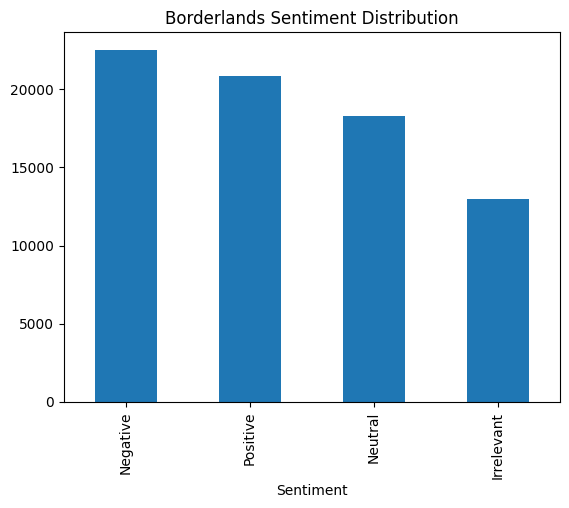

In [13]:
# Visualization

# Bar chart for Borderlands sentiments
borderlands_sentiments.plot(kind='bar', title='Borderlands Sentiment Distribution')
plt.show()

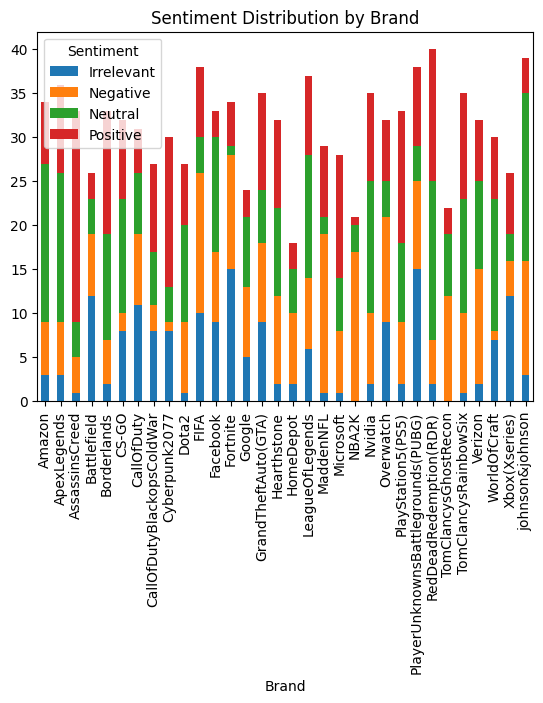

In [14]:
# Bar chart for sentiments per brand
various_sentiments.unstack().plot(kind='bar', stacked=True, title='Sentiment Distribution by Brand')
plt.show()

In [16]:
# Handle missing values
borderlands_df['Text'] = borderlands_df['Text'].fillna('')

# Sentiment analysis
borderlands_sentiments = borderlands_df['Sentiment'].value_counts()

# Word clouds for sentiments
positive_words = ' '.join(borderlands_df[borderlands_df['Sentiment'] == 'Positive']['Text'].astype(str))
neutral_words = ' '.join(borderlands_df[borderlands_df['Sentiment'] == 'Neutral']['Text'].astype(str))
negative_words = ' '.join(borderlands_df[borderlands_df['Sentiment'] == 'Negative']['Text'].astype(str))

wordcloud_positive = WordCloud(width=800, height=400).generate(positive_words)
wordcloud_neutral = WordCloud(width=800, height=400).generate(neutral_words)
wordcloud_negative = WordCloud(width=800, height=400).generate(negative_words)


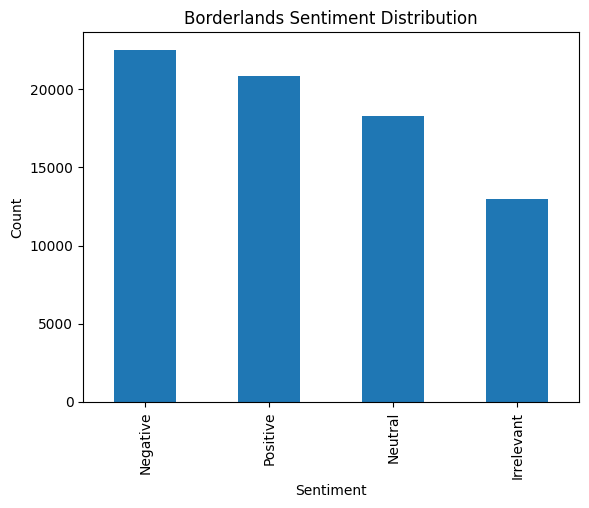

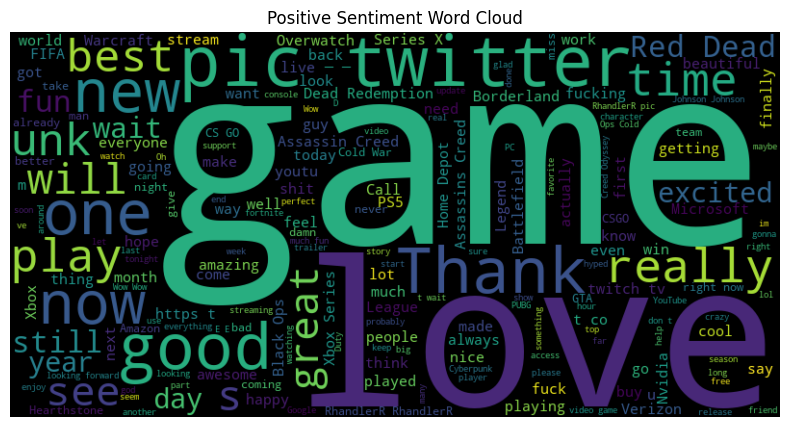

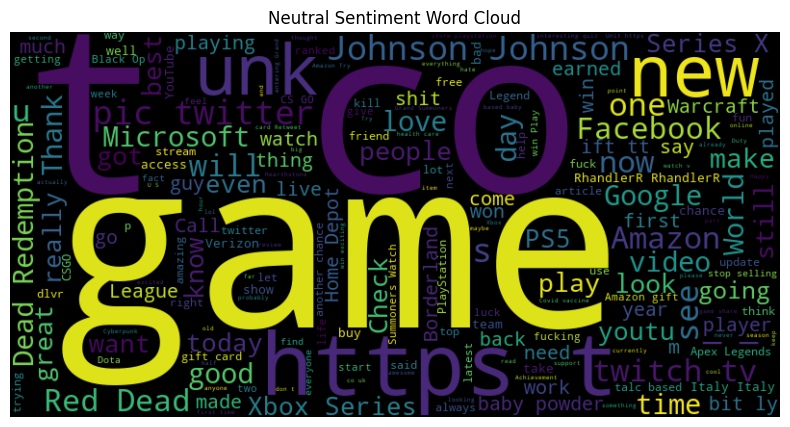

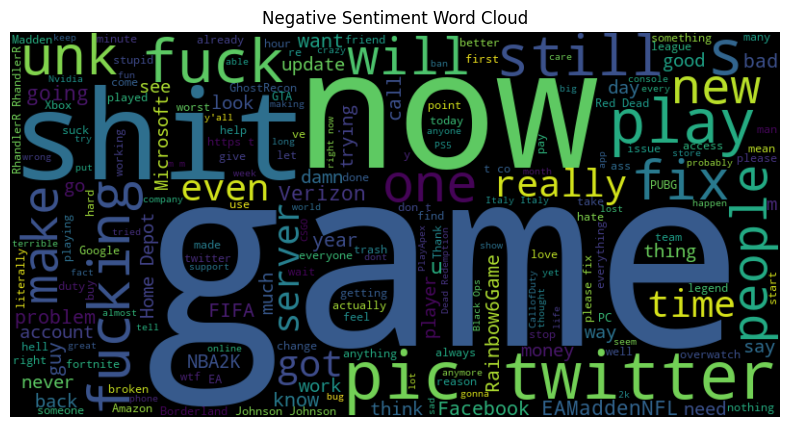

In [17]:
# Bar chart for Borderlands sentiments
borderlands_sentiments.plot(kind='bar', title='Borderlands Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Display word clouds
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Positive Sentiment Word Cloud')
plt.axis('off')
plt.show()

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_neutral, interpolation='bilinear')
plt.title('Neutral Sentiment Word Cloud')
plt.axis('off')
plt.show()

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Negative Sentiment Word Cloud')
plt.axis('off')
plt.show()